# 14 -- Fashion MNIST - Keras

## Victor Jose Novaes Pires

### 2019-03-17

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [4]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [5]:
from pandas import __version__

print(f"Pandas version: {__version__}")

Pandas version: 0.24.2


In [6]:
from scipy import __version__

print(f"SciPy version: {__version__}")

SciPy version: 1.2.1


In [7]:
from seaborn import __version__

print(f"Seaborn version: {__version__}")

Seaborn version: 0.9.0


In [8]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.3


In [9]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0.1


## Fashion MNIST dataset

In [10]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
import numpy as np

classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
num_classes = len(classes)

num_classes

10

In [13]:
names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

names = {k: v for k, v in zip(classes, names)}

names

{0: 'T-shirt/Top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### 4th Dimension

In [14]:
X_train = X_train.reshape([*X_train.shape] + [1])
X_test = X_test.reshape([*X_test.shape] + [1])

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Flattening

In [15]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train.shape, y_test.shape

((60000, 1), (10000, 1))

### Feature scaling

In [16]:
X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [17]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [18]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

In [19]:
X_train.min(), X_test.min(), X_test.max(), X_train.max()

(0.0, 0.0, 1.0, 1.0)

## Train & Validation

In [20]:
indices_dict = {k: [] for k in range(10)}

for i, y in enumerate(y_train):
    indices_dict[y[0]].append(i)

np.random.seed(42)

train_percentage = 0.75
train_indices = []
for key in indices_dict.keys():
    array = indices_dict[key]
    train_indices.append(np.random.choice(array,
                                          size=int(len(array)*train_percentage),
                                          replace=False))

train_indices = np.asarray(train_indices).flatten()

val_indices = np.asarray([i for i, _ in enumerate(y_train) if i not in train_indices])

train_indices.shape, val_indices.shape

((45000,), (15000,))

In [21]:
import pandas as pd

df = pd.DataFrame(data=np.bincount(y_train[train_indices].reshape(-1)), columns=['Train Count'])
df['Validation Count'] = np.bincount(y_train[val_indices].reshape(-1))
df.index.set_names('Labels', inplace=True)
df

,Train Count,Validation Count
Labels,,
0,4500,1500
1,4500,1500
2,4500,1500
3,4500,1500
4,4500,1500
5,4500,1500
6,4500,1500
7,4500,1500
8,4500,1500


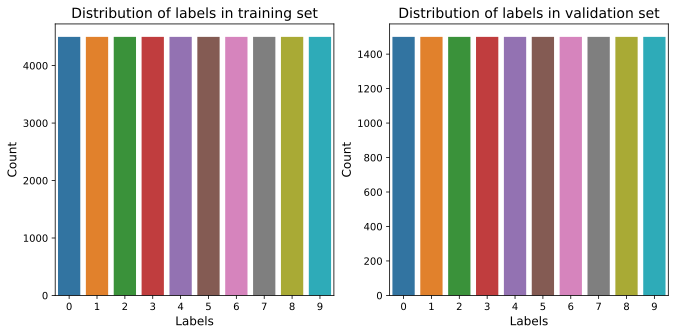

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 5))

plt.subplot(121)
sns.barplot(data=df[['Train Count']].T)
plt.title("Distribution of labels in training set", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(122)
sns.barplot(data=df[['Validation Count']].T)
plt.title("Distribution of labels in validation set", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

In [23]:
repeated = 0
for y in train_indices:
    if y in val_indices:
        repeated += 1
repeated

0

### Equations on: 01 -- Digits MNIST - NumPy

### Dataset analysis on: 11 -- Fashion MNIST - NumPy

## Convolutional Neural Network

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32,
                 kernel_size=[3, 3],
                 activation='relu',
                 kernel_initializer='TruncatedNormal',
                 input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))

model.add(MaxPooling2D([2, 2]))

model.add(Dropout(0.1))

model.add(Conv2D(64, [3, 3], activation='relu'))

model.add(MaxPooling2D([2, 2]))

model.add(Dropout(0.1))

model.add(Conv2D(128, [3, 3], activation='relu'))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [26]:
%%time

num_epochs = 50
fit = model.fit(X_train[train_indices],
                y_train[train_indices],
                epochs=num_epochs,
                validation_data=(X_train[val_indices], y_train[val_indices]))

print()

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 156s 3ms/step - loss: 0.5647 - acc: 0.7889 - val_loss: 0.3739 - val_acc: 0.8645
Epoch 2/50
45000/45000 [==============================] - 48s 1ms/step - loss: 0.3635 - acc: 0.8632 - val_loss: 0.3089 - val_acc: 0.8865
Epoch 3/50
45000/45000 [==============================] - 66s 1ms/step - loss: 0.3103 - acc: 0.8851 - val_loss: 0.2920 - val_acc: 0.8945
Epoch 4/50
45000/45000 [==============================] - 54s 1ms/step - loss: 0.2845 - acc: 0.8934 - val_loss: 0.2705 - val_acc: 0.9017
Epoch 5/50
45000/45000 [==============================] - 58s 1ms/step - loss: 0.2634 - acc: 0.9013 - val_loss: 0.2425 - val_acc: 0.9115
Epoch 6/50
45000/45000 [==============================] - 59s 1ms/step - loss: 0.2455 - acc: 0.9098 - val_loss: 0.2643 - val_acc: 0.9027
Epoch 7/50
45000/45000 [==============================] - 59s 1ms/step - loss: 0.2321 - acc: 0.9130 - val_loss: 0.2373 - val_ac

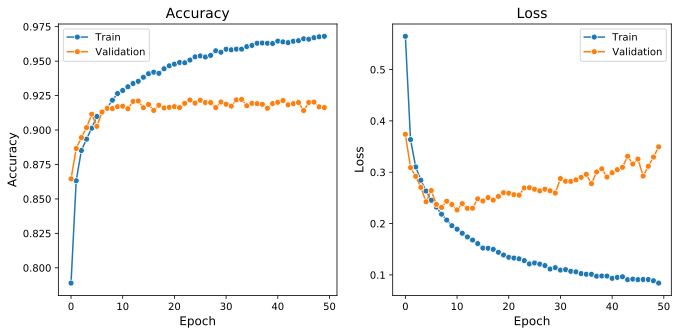

In [27]:
plt.figure(figsize=(11, 5))

plt.subplot(121)
sns.lineplot(x=np.arange(num_epochs), y=fit.history['acc'], marker='o')
sns.lineplot(x=np.arange(num_epochs), y=fit.history['val_acc'], marker='o')
plt.title("Accuracy", fontsize=14)
plt.legend(['Train', 'Validation'])
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.subplot(122)
sns.lineplot(x=np.arange(num_epochs), y=fit.history['loss'], marker='o')
sns.lineplot(x=np.arange(num_epochs), y=fit.history['val_loss'], marker='o')
plt.title("Loss", fontsize=14)
plt.legend(['Train', 'Validation'])
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.show()

## Scores

### Training set

In [28]:
import NNfromScratch as nnfs

p_train = np.argmax(model.predict(X_train), axis=1).reshape(-1, 1)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 97.03%


In [29]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 58,217 out of 60,000 images.


In [30]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 1,783 out of 60,000 images.


### Test set

In [31]:
p_test = np.argmax(model.predict(X_test), axis=1).reshape(-1, 1)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 90.84%


In [32]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 9,084 out of 10,000 images.


In [33]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 916 out of 10,000 images.


## Distribution of labels

In [34]:
df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])
df['Pred Train'] = np.bincount(p_train.reshape(-1))
df['Train Diff'] = df['Pred Train'] - df['Y Train']
df['Y Test'] = np.bincount(y_test.reshape(-1))
df['Pred Test'] = np.bincount(p_test.reshape(-1))
df['Test Diff'] = df['Pred Test'] - df['Y Test']
df['Y Combined'] = df['Y Train'] + df['Y Test']
df['Pred Combined'] = df['Pred Train'] + df['Pred Test']
df['Combined Diff'] = df['Pred Combined'] - df['Y Combined']
df.index.set_names('Labels', inplace=True)
df

,Y Train,Pred Train,Train Diff,Y Test,Pred Test,Test Diff,Y Combined,Pred Combined,Combined Diff
Labels,,,,,,,,,
0,6000,6292,292,1000,1087,87,7000,7379,379
1,6000,5991,-9,1000,981,-19,7000,6972,-28
2,6000,6180,180,1000,1064,64,7000,7244,244
3,6000,6012,12,1000,997,-3,7000,7009,9
4,6000,5967,-33,1000,1001,1,7000,6968,-32
5,6000,5966,-34,1000,982,-18,7000,6948,-52
6,6000,5559,-441,1000,859,-141,7000,6418,-582
7,6000,6116,116,1000,1063,63,7000,7179,179
8,6000,5982,-18,1000,998,-2,7000,6980,-20


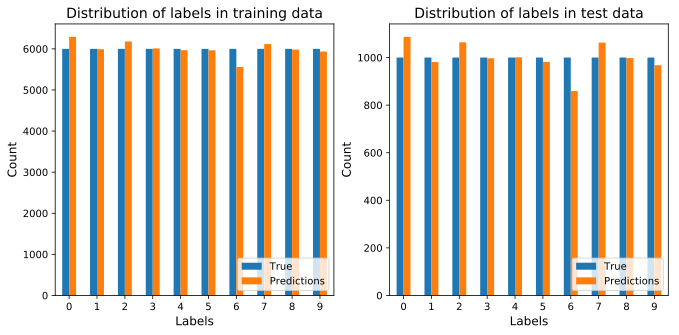

In [35]:
fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

df[['Y Train', 'Pred Train']].plot.bar(ax=axes[0], rot=0)
axes[0].set_title("Distribution of labels in training data", fontsize=14)
axes[0].set_xlabel("Labels", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(['True', 'Predictions'], loc='lower right')

df[['Y Test', 'Pred Test']].plot.bar(ax=axes[1], rot=0)
axes[1].set_title("Distribution of labels in test data", fontsize=14)
axes[1].set_xlabel("Labels", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(['True', 'Predictions'], loc='lower right')

plt.show()

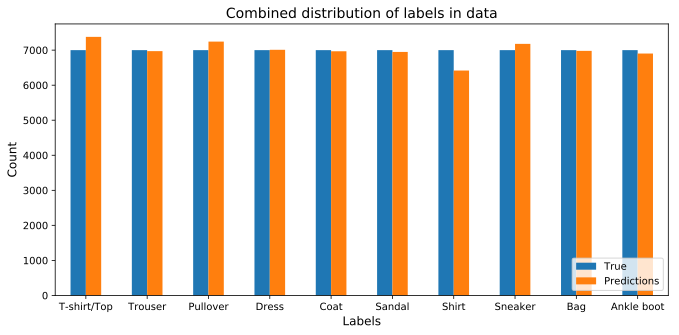

In [36]:
df[['Y Combined', 'Pred Combined']].plot.bar(figsize=(11, 5), rot=0)
plt.title("Combined distribution of labels in data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(np.arange(10), names.values())
plt.legend(['True', 'Predictions'], loc='lower right')
plt.show()

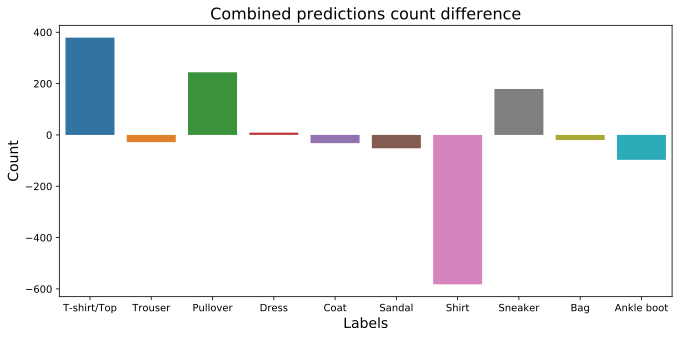

In [37]:
plt.figure(figsize=[11, 5])
sns.barplot(data=df[['Combined Diff']].T)
plt.title("Combined predictions count difference", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(np.arange(10), names.values())
plt.show()

## Correctly classified images

In [38]:
def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {names[y[indices[i]][0]]} | Pred: {names[p[indices[i]][0]]}", fontsize=10)
        ax.set_axis_off()

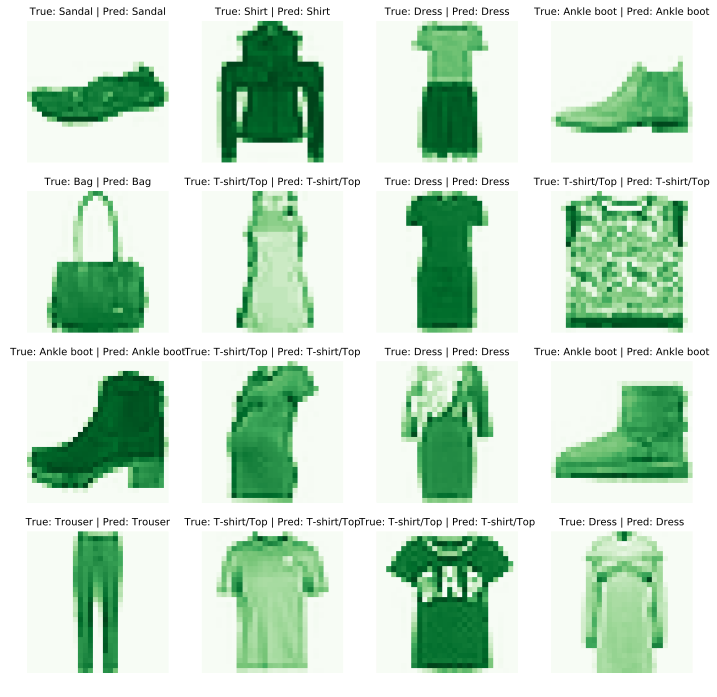

In [39]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

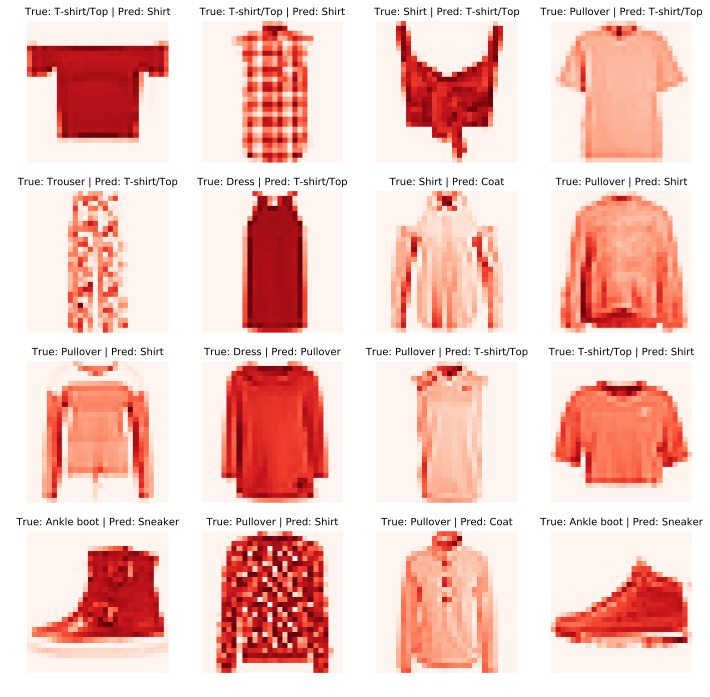

In [40]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')